# Importing the Dataset

In [40]:
import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ford-car-price-prediction/ford.csv


In [41]:
#Read the csv file
df = pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv', sep=',')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [42]:
# Get the shape of the DataFrame
df.shape

(17966, 9)

In [43]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [44]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# Data Preparation
**Data Cleaning**

In [45]:
# Duplicate rows
df.duplicated().sum()

154

In [46]:
#Drop Duplicate rowa
df = df.drop_duplicates()
df = df.drop_duplicates(keep='last')
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [47]:
#missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Data Insights and Visualization

In [48]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlations with the target column 'price', sort by absolute value, and drop the target itself
top_corr = correlation_matrix['price'].drop('price').abs().sort_values(ascending=False)

# Get the top 5 attributes
top_5_attributes = top_corr.head(5)

# Print result
print("Top 5 attributes most correlated with 'price':")
print(top_5_attributes)


Top 5 attributes most correlated with 'price':
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405969
mpg           0.346263
Name: price, dtype: float64


In [49]:
# Count the number of occurrences for each unique value in 'fuelType'
fuel_type_counts = df['fuelType'].value_counts()

# Display the result
print("Number of cars by fuel type:")
print(fuel_type_counts)

Number of cars by fuel type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


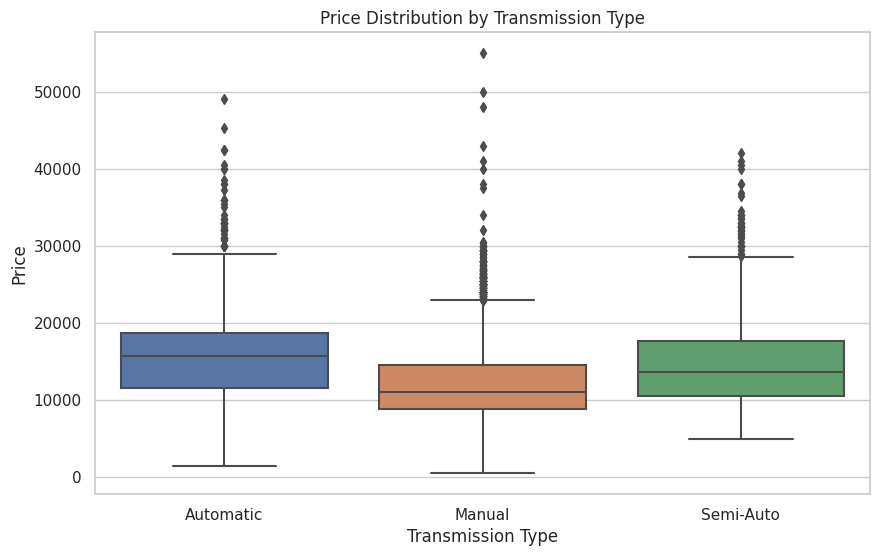

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the plot style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Add title and labels
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show the plot
plt.show()


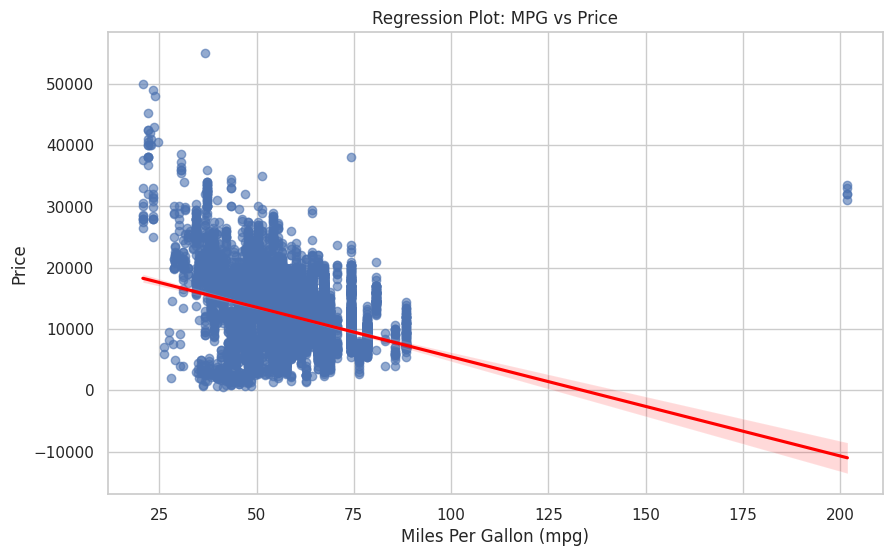

In [51]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add title and labels
plt.title('Regression Plot: MPG vs Price')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Price')

# Show the plot
plt.show()

In [52]:
#check correlation numerically
df[['mpg', 'price']].corr()

,mpg,price
mpg,1.000000,-0.346263
price,-0.346263,1.000000


# Model Development and Evaluation

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split



# Define source (X) and target (y) variables
X = df[['mpg']]   # Feature must be 2D for sklearn
y = df['price']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (R-squared): 0.1504
Mean Squared Error (MSE): 19049855.14


In [54]:
# Define feature columns and target column
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'


# Define X and y
X = df[features]
y = df[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (R-squared): 0.6917
Mean Squared Error (MSE): 6912744.83


In [55]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Define features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'


X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (R-squared): 0.1212
Mean Squared Error (MSE): 19704684.07


In [56]:

from sklearn.linear_model import Ridge

# Define features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'


# Source (X) and target (y)
X = df[features]
y = df[target]

# Split data into training and testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (R-squared): 0.6917
Mean Squared Error (MSE): 6912725.72


In [57]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'



# Define X (source attributes) and y (target attribute)
X = df[features]
y = df[target]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply second degree polynomial scaling to the data
poly = PolynomialFeatures(degree=2)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)

# Transform the testing data using the same transformation
X_test_poly = poly.transform(X_test)

# Step 3: Create and fit Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Step 4: Predict on the test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (R-squared): 0.6733
Mean Squared Error (MSE): 7326153.59


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [58]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score

# Define features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'


# Define X (source attributes) and y (target attribute)
X = df[features]
y = df[target]

# Step 1: Split data into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply second degree polynomial scaling to the data
poly = PolynomialFeatures(degree=2)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)

# Transform the testing data using the same transformation
X_test_poly = poly.transform(X_test)

# Step 3: Create Ridge regression model and perform Grid Search with cross-validation
ridge_model = Ridge()

# Define the range of alphas to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV object with 4-fold cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the grid search model to the training data
grid_search.fit(X_train_poly, y_train)

# Get the best alpha from grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha from Grid Search: {best_alpha}")

# Step 4: Fit the Ridge model with the best alpha on the entire training data
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred = best_ridge_model.predict(X_test_poly)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Best alpha from Grid Search: 0.01
R² (R-squared): 0.3827
Mean Squared Error (MSE): 13840973.17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin